In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv("./data/ecommerce.csv")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [70]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: >

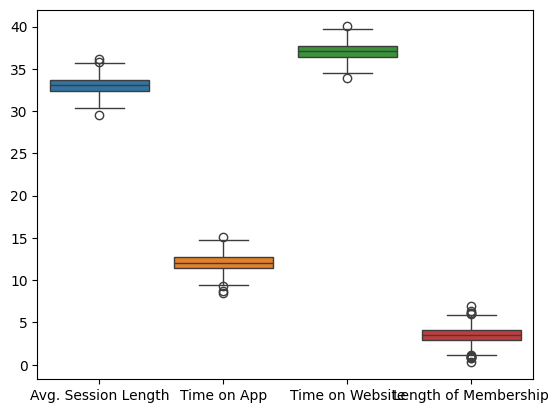

In [71]:
sns.boxplot(data[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']])

In [72]:
outlier = data.describe()

In [73]:
outlier.loc['75%'] + (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

Avg. Session Length      35.767230
Time on App              14.802394
Time on Website          39.767195
Length of Membership      5.920580
Yearly Amount Spent     705.727153
dtype: float64

In [74]:
outlier.loc['25%'] - (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

Avg. Session Length      30.286577
Time on App               9.339609
Time on Website          34.298495
Length of Membership      1.136371
Yearly Amount Spent     288.624951
dtype: float64

In [101]:
#사는 곳이 연봉에 영향을 미치는지 살펴보기 위함
def address(x):
    L = []
    for i in data['Address'].str.split(","):
        L.append(i[-1].split()[-2])
    print(L)


In [103]:
data1 = data.copy()

In [107]:
data['Address'].str.split(",").apply(lambda x:x[-1].split()[-2])

0      MI
1      CA
2      DC
3      OH
4      PR
       ..
495    UT
496    CA
497    TN
498    TX
499    OR
Name: Address, Length: 500, dtype: object

In [108]:
data['state_name'] = data['Address'].str.split(",").apply(lambda x:x[-1].split()[-2])

In [109]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,TX


In [112]:
data.groupby('state_name')['Yearly Amount Spent'].describe() #미국 우편번호 체계는 주 외에도 괌이나 미군지역도 다 포함한다.

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
AA,17.0,494.393940,72.011718,308.527747,436.515606,519.340989,547.365141,588.712606
AE,18.0,482.601682,92.842442,256.670582,420.285739,474.498979,547.405206,614.715334
AK,7.0,477.154550,71.908435,357.783111,441.411746,501.100245,514.828713,568.717576
AL,9.0,510.004438,58.850591,451.457447,473.360496,493.180216,510.159817,642.101579
AP,11.0,509.261497,111.266776,338.319863,467.614386,507.390062,549.975863,744.221867
...,...,...,...,...,...,...,...,...
VT,12.0,512.502240,98.228516,410.069611,439.143595,473.775704,571.978885,708.935185
WA,4.0,536.117901,79.947676,442.722892,483.870726,544.074695,596.321871,613.599323
WI,5.0,536.689168,83.176785,443.965627,492.105052,528.309225,552.940345,666.125592


### 선형성 독립성 등분산성 정규성

In [115]:
data.corr(numeric_only=True) #숫자로 된 변수만 상관관계 분석

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

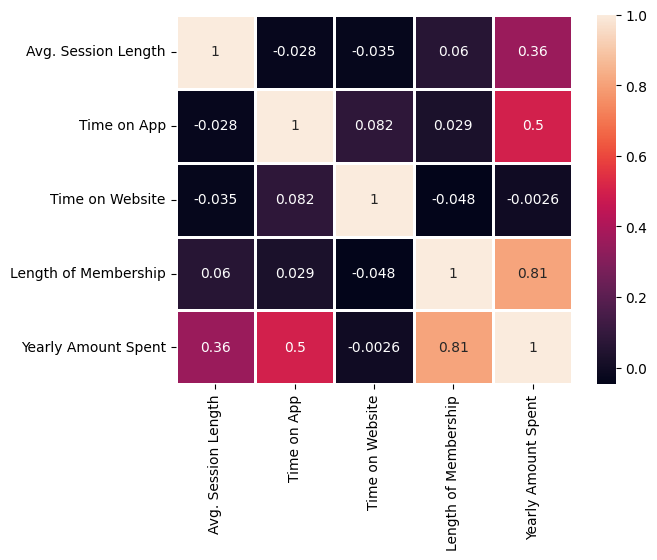

In [116]:
sns.heatmap(data.corr(numeric_only=True), annot =True, linewidth = 1)

In [ ]:
# 독립변수 Length of Membership과 종속변수 Yearly Amount Spent가 관계가 높음
# 독립변수 Time on App과 Time on Website 끼리도 상관성 높음

In [120]:
# data = data.drop(['Email', 'Address', 'Avatar'], axis = 1)
# data.head()

In [121]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'state_name'],
      dtype='object')

In [123]:
data.columns = [col.replace(" ","").replace(".", "") for col in data.columns] # 컬럼명 여백 제거
data.columns

Index(['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership',
       'YearlyAmountSpent', 'state_name'],
      dtype='object')

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = data.drop('YearlyAmountSpent', axis = 1)
y = data['YearlyAmountSpent']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [ ]:
# 다중선형회귀분석하기

In [128]:
from statsmodels.formula.api import ols

In [129]:
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.head()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name,YearlyAmountSpent
342,32.342796,11.409645,35.777782,3.872432,MT,486.083426
359,32.054262,13.149670,37.650400,4.195614,ME,561.874658
109,33.356874,13.452129,38.503009,3.318822,MP,549.008227
50,33.256335,13.858062,37.780265,5.976768,UT,725.584814
452,33.552108,11.120871,36.808376,4.027814,ME,521.195311


In [130]:
train_data.columns

Index(['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership',
       'state_name', 'YearlyAmountSpent'],
      dtype='object')

In [132]:
lm = ols('YearlyAmountSpent ~ AvgSessionLength + TimeonApp + TimeonWebsite + LengthofMembership + state_name', train_data).fit() 
#R은 종속변수먼저, 이후 독립변수 나열해야 함

In [133]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     389.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          4.36e-279
Time:                        15:08:04   Log-Likelihood:                -1449.5
No. Observations:                 400   AIC:                             3031.
Df Residuals:                     334   BIC:                             3294.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1044.0261     27.310    -38.228      0.000   -1097.748    -990.304
state_name[T.AE]      -0.2681      3.692     -0.073      0.942      -7.531       6.995
state_name[T.AK]       0.6355      5.219      0.122      0.903      -9.631      10.902
state_name[T.AL]      -1.4055      4.423     -0.318      0.751     -10.106       7.295
state_name[T.AP]      -2.0814      4.127     -0.504      0.614     -10.200       6.037
state_name[T.AR]      11.2649      5.701      1.976      0.049       0.050      22.480
state_name[T.AS]      -2.9825      4.620     -0.646      0.519     -12.070       6.105
state_name[T.AZ]      -3.4977      4.606     -0.759      0.448     -12.558       5.563
state_name[T.CA]       3.2973      5.208      0.633      0.527      -6.948      13.543
state_name[T.CO]       4.3226      5.638      0.767      0.444      -6.768      15.413
state_name[T.CT]      -1.8944      5.675     -0.334      0.739     -13.058       9.269
state_name[T.DC]      -7.1931      5.631     -1.277      0.202     -18.270       3.883
state_name[T.DE]      -2.2724      4.125     -0.551      0.582     -10.388       5.843
state_name[T.FL]      -1.0106      4.409     -0.229      0.819      -9.683       7.662
state_name[T.FM]       1.5194      4.858      0.313      0.755      -8.037      11.076
state_name[T.GA]       6.3291      4.620      1.370      0.172      -2.759      15.417
state_name[T.GU]      -1.2212      5.663     -0.216      0.829     -12.361       9.919
state_name[T.HI]      -3.0376      4.846     -0.627      0.531     -12.571       6.496
state_name[T.IA]       5.8753      4.876      1.205      0.229      -3.717      15.467
state_name[T.ID]      -7.0579     10.301     -0.685      0.494     -27.322      13.206
state_name[T.IL]       2.5970      4.850      0.535      0.593      -6.943      12.137
state_name[T.IN]       1.6246      4.883      0.333      0.740      -7.980      11.229
state_name[T.KS]       3.4717      4.408      0.788      0.432      -5.200      12.143
state_name[T.KY]      -1.9248      4.405     -0.437      0.662     -10.590       6.741
state_name[T.LA]       0.3371      4.863      0.069      0.945      -9.229       9.903
state_name[T.MA]       0.3770      5.188      0.073      0.942      -9.829      10.583
state_name[T.MD]       7.5277      5.182      1.453      0.147      -2.666      17.721
state_name[T.ME]       3.6069      4.625      0.780      0.436      -5.490      12.704
state_name[T.MH]      -0.7961      4.876     -0.163      0.870     -10.387       8.795
state_name[T.MI]       9.6009      4.401      2.181      0.030       0.943      18.258
state_name[T.MN]       0.8870      4.911      0.181      0.857      -8.773      10.547
state_name[T.MO]       5.8362      4.023      1.451      0.148      -2.077      13.750
state_name[T.MP]       6.4842      5.6

In [ ]:
# 수정된 결정계수는 0.984
# p-value 4.36e-279로 통계적으로 유의미한 모델
# AR 0.049     11.2649
# MI 0.030     9.6009
# MT 0.013     12.1776
# y = 11

In [136]:
import statsmodels.api as sm

In [137]:
X_train = sm.add_constant(X_train)
y_rain = sm.add_constant(X_test)

In [138]:
X_train.head(2)

,const,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name
342,1.0,32.342796,11.409645,35.777782,3.872432,MT
359,1.0,32.054262,13.149670,37.650400,4.195614,ME


In [ ]:
lr = sm.OLS(y_train, X_train).fit()

In [8]:
data['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [15]:
data['Avatar'].value_counts()

Avatar
Teal              7
Cyan              7
CadetBlue         7
GreenYellow       7
SlateBlue         7
                 ..
PaleGoldenRod     1
Coral             1
NavajoWhite       1
PaleGreen         1
LightSlateGray    1
Name: count, Length: 138, dtype: int64

In [9]:
data['Avg. Session Length'].unique()

array([34.49726773, 31.92627203, 33.00091476, 34.30555663, 33.33067252,
       33.87103788, 32.0215955 , 32.73914294, 33.9877729 , 31.93654862,
       33.99257277, 33.87936082, 29.53242897, 33.19033404, 32.38797585,
       30.73772037, 32.1253869 , 32.33889932, 32.18781205, 32.61785606,
       32.91278511, 33.50308726, 31.53160448, 32.90325097, 34.507551  ,
       33.02933195, 33.54123131, 32.33598964, 33.11020506, 33.10543794,
       33.24190043, 33.4610563 , 32.17550124, 32.72836   , 32.82030995,
       33.61603789, 31.72165236, 32.86532717, 32.74936818, 32.56723048,
       32.07054622, 33.01954799, 33.79203908, 32.89398062, 32.04448613,
       34.55576799, 34.56455771, 32.7267846 , 33.11721873, 31.66104982,
       33.25633547, 33.90022441, 34.18777483, 33.76206924, 34.39016366,
       33.9252966 , 32.6882293 , 34.30187022, 32.84393022, 33.75499473,
       33.87978429, 33.07653561, 32.22729914, 32.78977262, 32.77260993,
       34.37425805, 33.07871721, 32.8052204 , 32.43075793, 32.17

In [10]:
data['Time on App'].unique()

array([12.65565115, 11.10946073, 11.33027806, 13.71751367, 12.79518855,
       12.02692534, 11.36634831, 12.35195897, 13.38623528, 11.81412829,
       13.33897545, 11.584783  , 10.9612984 , 12.95922609, 13.14872569,
       12.63660605, 11.73386169, 12.01319469, 14.71538754, 13.98959256,
       11.36549203, 12.8779837 , 13.37856278, 11.65757592, 12.8936695 ,
       11.76581265, 12.78389178, 13.00781942, 11.98204499, 11.96502   ,
       12.30541781, 10.86916381, 13.38749211, 13.10450724, 11.63489325,
       11.9363865 , 11.7550237 , 11.98441752,  9.95497597, 12.48901322,
       11.73310622, 10.63456132, 12.50752537, 11.52987821, 13.41493474,
       12.17052542, 13.14655143, 12.98851015, 11.86412636, 11.39806419,
       13.85806246, 10.95679097, 10.32011626,  9.9845144 , 12.64519514,
       11.58865542, 13.76153285, 10.56829469, 11.83228622, 12.06415663,
       12.4955916 ,  9.60731469, 13.72862718, 11.67006592, 13.27631301,
       15.12699429, 12.69578975, 11.83547609, 11.30623234, 11.18

In [11]:
data['Length of Membership'].unique()

array([4.08262063, 2.66403418, 4.1045432 , 3.12017878, 4.44630832,
       5.4935072 , 4.68501725, 4.43427343, 3.27343358, 3.20280607,
       2.48260777, 3.7132092 , 4.04642316, 3.91854184, 2.49454365,
       3.35784684, 3.13613272, 2.42080616, 1.51657558, 4.06454855,
       4.59993736, 1.55915194, 2.24514779, 3.91930231, 5.70515397,
       2.72173599, 4.64819932, 2.99636453, 3.92348875, 4.74257752,
       3.06236815, 3.47141345, 4.34306292, 2.82009723, 4.1245853 ,
       3.64928616, 1.84737042, 3.45238858, 4.65049127, 4.22243623,
       4.67127546, 4.64611998, 4.21449509, 4.64325855, 2.25868639,
       3.66310549, 3.87687518, 4.11322612, 3.2025312 , 3.19839927,
       5.97676813, 2.95266896, 2.09489171, 3.85547168, 2.87459691,
       3.39205049, 2.99576118, 3.31522475, 3.47191914, 3.97055563,
       4.63932033, 5.08121009, 4.80263063, 3.41468842, 3.46229885,
       5.37759358, 4.00178635, 3.43959056, 2.77952072, 3.55264977,
       2.60228711, 4.69432227, 3.40152234, 3.8515788 , 3.25811

In [12]:
data['Yearly Amount Spent'].unique()

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205, 637.10244792, 521.57217476, 549.90414611,
       570.20040896, 427.1993849 , 492.60601272, 522.33740461,
       408.64035107, 573.41586733, 470.4527333 , 461.7807422 ,
       457.84769594, 407.70454755, 452.31567548, 605.0610388 ,
       534.70574381, 419.93877484, 436.51560573, 519.34098913,
       700.91709162, 423.17999168, 619.89563986, 486.83893477,
       529.53766534, 554.72208383, 497.5866713 , 447.68790654,
       588.71260551, 491.07322368, 507.44183234, 521.88357317,
       347.77692663, 490.73863214, 478.17033405, 537.84619527,
       532.75178758, 501.87443028, 591.19717818, 547.24434342,
       448.22982919, 549.86059046, 593.91500297, 563.67287336,
       479.73194909, 416.35835358, 725.58481406, 442.66725174,
       384.62657157, 451.45744687, 522.40414126, 483.67330802,
       520.89879445, 453.16950235, 496.65070807, 547.36514059,
       616.85152297, 507.212569  , 613.59932337, 483.15

<Axes: ylabel='Frequency'>

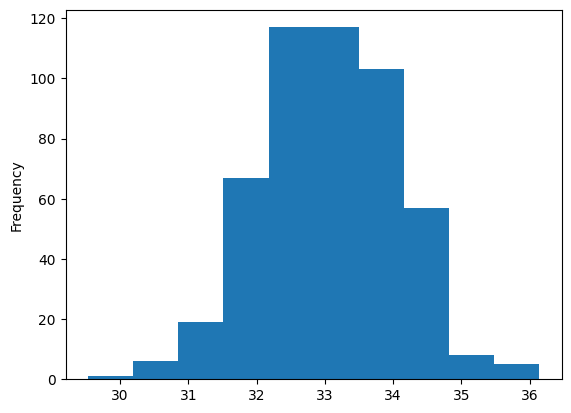

In [19]:
data['Avg. Session Length'].plot(kind='hist')

<Axes: ylabel='Frequency'>

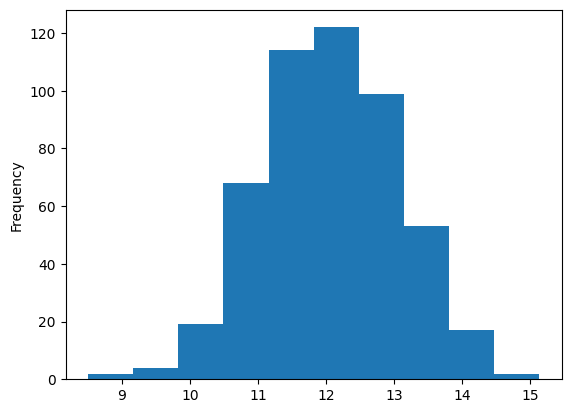

In [20]:
data['Time on App'].plot(kind='hist')

<Axes: ylabel='Frequency'>

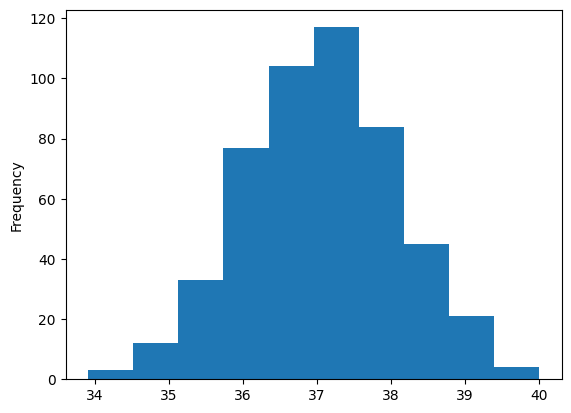

In [21]:
data['Time on Website'].plot(kind='hist')

<Axes: ylabel='Frequency'>

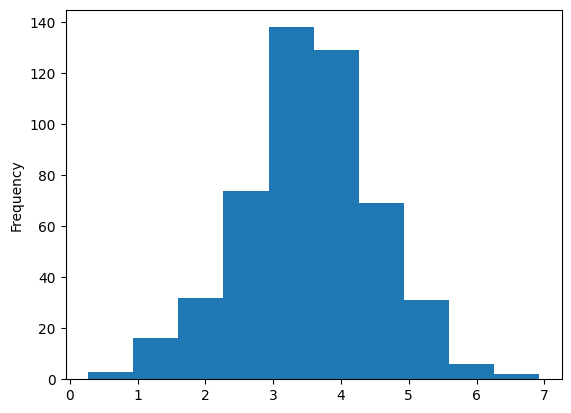

In [22]:
data['Length of Membership'].plot(kind='hist')

<Axes: ylabel='Frequency'>

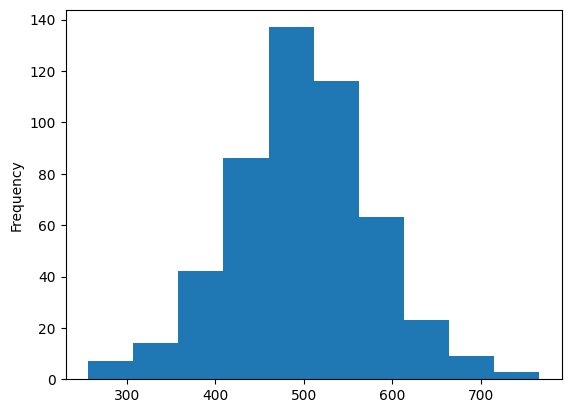

In [23]:
data['Yearly Amount Spent'].plot(kind='hist')

In [13]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [46]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


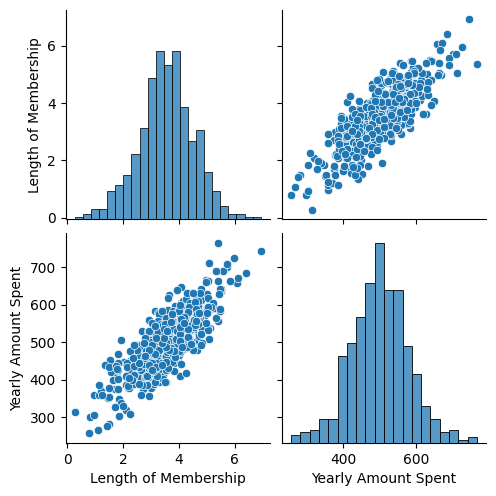

In [33]:
sns.pairplot(data[['Length of Membership', 'Yearly Amount Spent']])

In [41]:
import pandas as pd
import statsmodels.api as sm

In [44]:
df = pd.read_csv('./data/ecommerce.csv')
df = df.drop(columns=['Email', 'Address'])

In [45]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# 상수항 추가 (회귀모델에서 절편을 고려)
X = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                         12:00:14   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [49]:
# plt.scatter(X, y)
# plt.plot(X, y_pred)
# plt.show()

In [50]:
X

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485


In [51]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64